In [136]:
!jupyter nbconvert --to html "C:/xampp/htdocs/ml_personalNGroup/Group/chalenge2/notebooks/03-modeling.ipynb"

[NbConvertApp] Converting notebook C:/xampp/htdocs/ml_personalNGroup/Group/chalenge2/notebooks/03-modeling.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 1 image(s).
[NbConvertApp] Writing 622417 bytes to C:\xampp\htdocs\ml_personalNGroup\Group\chalenge2\notebooks\03-modeling.html


## Tải dữ liệu đã làm sạch 

In [1]:
import pandas as pd

# Đọc dữ liệu đã xử lý
df_train_clean = pd.read_csv("../data/03_processed/train_clean.csv")
df_test_clean = pd.read_csv("../data/03_processed/test_clean.csv")

print(df_train_clean.shape, df_test_clean.shape)
df_train_clean.head()


(1460, 264) (1459, 245)


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,TotalSF,TotalBathrooms,Age
0,-1.730865,0.073375,-0.231877,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.514104,0.575425,...,False,True,False,False,False,True,False,-0.001277,1.642256,-1.043259
1,-1.728492,-0.872563,0.437043,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.570750,1.171992,...,False,True,False,False,False,True,False,-0.052407,0.368581,-0.183465
2,-1.726120,0.073375,-0.098093,0.073480,0.651479,-0.517200,0.984752,0.830215,0.325915,0.092907,...,False,True,False,False,False,True,False,0.169157,1.642256,-0.977121
3,-1.723747,0.309859,-0.454850,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.570750,-0.499274,...,False,True,False,False,False,False,False,-0.114493,-0.268257,1.800676
4,-1.721374,0.073375,0.615421,0.375148,1.374795,-0.517200,0.951632,0.733308,1.366489,0.463568,...,False,True,False,False,False,True,False,0.944631,1.642256,-0.944052


## Chuẩn bị dữ liệu huấn luyện

In [2]:
# Biến mục tiêu (đã log-transform)
y_train = df_train_clean['SalePrice']

# Đặc trưng đầu vào
X_train = df_train_clean.drop(['SalePrice', 'Id'], axis=1)

# Dữ liệu test
X_test = df_test_clean.drop('Id', axis=1)

## Chia dữ liệu thành Train và Validation

In [3]:
from sklearn.model_selection import train_test_split

X_train_split, X_val, y_train_split, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)

print("Train size:", X_train_split.shape)
print("Validation size:", X_val.shape)


Train size: (1168, 262)
Validation size: (292, 262)


In [6]:
from sklearn.model_selection import train_test_split
import pandas as pd
from datetime import datetime

# --- Chia dữ liệu ---
X_train_split, X_val, y_train_split, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)

print("Train size:", X_train_split.shape)
print("Validation size:", X_val.shape)

# --- Ghi log (3 cột: thời gian, nội dung, kết luận) ---
log_data = {
    "Thời gian chạy": [datetime.now().strftime("%Y-%m-%d %H:%M:%S")],
    "Nội dung làm": ["Chia dữ liệu train/validation 80/20 cho mô hình XGBoost"],
    "Kết luận": ["Dữ liệu đã được chia hợp lý giúp đánh giá mô hình khách quan, tránh overfitting"]
}

log_df = pd.DataFrame(log_data)
log_df.to_excel("../reports/modeling.xlsx", index=False)

print("\nĐã ghi log vào file: modeling.xlsx")


Train size: (1168, 262)
Validation size: (292, 262)

Đã ghi log vào file: modeling.xlsx


## Huấn luyện với mô hình tuyến tính Ridge Regression

In [5]:
import pandas as pd
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.linear_model import Ridge

model_ridge = Ridge(alpha=10)
model_ridge.fit(X_train_split, y_train_split)

# Dự đoán trên tập validation
preds_ridge = model_ridge.predict(X_val)


RMSLE giúp mô hình đánh giá sai lệch theo tỷ lệ (%) thay vì giá trị tuyệt đối — điều này hợp lý khi dự đoán giá nhà, vốn có sự chênh lệch lớn giữa các nhóm giá.

In [9]:
from datetime import datetime

# Tính RMSE (RMSLE)
rmse_ridge = np.sqrt(mean_squared_error(y_val, preds_ridge))
print(f"RMSE của Ridge: {rmse_ridge:.5f}")

# Ghi log vào file modeling.xlsx
log_data = {
    "Thời gian chạy": [datetime.now().strftime("%Y-%m-%d %H:%M:%S")],
    "Nội dung làm": ["Tính RMSE cho Ridge Regression"],
    "Kết luận": [f"RMSE Ridge = {rmse_ridge:.5f}"]
}

log_df = pd.DataFrame(log_data)
with pd.ExcelWriter("../reports/modeling.xlsx", mode="a", if_sheet_exists="overlay", engine="openpyxl") as writer:
    log_df.to_excel(writer, index=False, header=False, startrow=writer.sheets['Sheet1'].max_row)
print("Đã ghi log vào file: modeling.xlsx")

RMSE của Ridge: 0.13902
Đã ghi log vào file: modeling.xlsx


Giá trị RMSE = 0.34816 (tính trên dữ liệu đã log-transform) tương ứng với RMSLE ≈ 0.35, tức là sai lệch trung bình khoảng:

𝑒^
0.34816
−
1
≈
41.6
%


→ Trung bình mô hình dự đoán giá nhà lệch khoảng 41% so với thực tế.

Nhận xét:

Giá trị RMSE = 0.34816 của Ridge Regression là ổn. Mô hình đã học được xu hướng dữ liệu, nhưng cần thêm đặc trưng và mô hình phi tuyến để đạt độ chính xác cao hơn

## Thử các mô hình nâng cao

In [6]:
from datetime import datetime

from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

models = {
    "Ridge": Ridge(alpha=10),
    "RandomForest": RandomForestRegressor(n_estimators=200, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=500, learning_rate=0.05, max_depth=4, random_state=42),
    "LightGBM": LGBMRegressor(n_estimators=500, learning_rate=0.05, random_state=42)
}

results = []
log_entries = []

for name, model in models.items():
    model.fit(X_train_split, y_train_split)
    preds = model.predict(X_val)
    rmse = np.sqrt(mean_squared_error(y_val, preds))
    results.append((name, rmse))
    print(f"{name}: RMSE = {rmse:.5f}")
    log_entries.append({
        "Thời gian chạy": datetime.now().strftime("%Y-%m-%d %H:%M:%S"),
        "Nội dung làm": f"Huấn luyện và đánh giá {name}",
        "Kết luận": f"RMSE {name} = {rmse:.5f}"
    })

results_df = pd.DataFrame(results, columns=["Model", "RMSE"]).sort_values("RMSE")
display(results_df)

# Ghi log vào file modeling.xlsx
log_df = pd.DataFrame(log_entries)
with pd.ExcelWriter("../reports/modeling.xlsx", mode="a", if_sheet_exists="overlay", engine="openpyxl") as writer:
    log_df.to_excel(writer, index=False, header=False, startrow=writer.sheets['Sheet1'].max_row)
print("Đã ghi log vào file: modeling.xlsx")


Ridge: RMSE = 0.13902
RandomForest: RMSE = 0.14756
XGBoost: RMSE = 0.13902
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001030 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3557
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 172
[LightGBM] [Info] Start training from score 12.030658
LightGBM: RMSE = 0.13857


,Model,RMSE
3,LightGBM,0.138569
2,XGBoost,0.139023
0,Ridge,0.139024
1,RandomForest,0.147560


Đã ghi log vào file: modeling.xlsx


## Huấn luyện mô hình tốt nhất (XGBoost) trên toàn bộ dữ liệu

Sử dụng Optuna tìm siêu tham số tối ưu bằng kỹ thuật Bayesian optimization để tối ưu hóa hiệu suất

In [7]:
import pandas as pd
from datetime import datetime

import optuna
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor

def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 300, 800),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1),
        'max_depth': trial.suggest_int('max_depth', 3, 7),
        'subsample': trial.suggest_float('subsample', 0.7, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.7, 1.0),
        'gamma': trial.suggest_float('gamma', 0, 0.3),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 6)
    }

    model = XGBRegressor(**params, random_state=42)
    scores = cross_val_score(model, X_train_split, y_train_split,
                             scoring='neg_root_mean_squared_error', cv=3)
    return -scores.mean()

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=30)

print("Best parameters:", study.best_params)
print("Best RMSE (CV):", study.best_value)

# Ghi log vào file modeling.xlsx
log_data = {
    "Thời gian chạy": [datetime.now().strftime("%Y-%m-%d %H:%M:%S")],
    "Nội dung làm": ["Optuna tìm siêu tham số tối ưu cho XGBoost"],
    "Kết luận": [f"Best params: {study.best_params}, Best RMSE (CV): {study.best_value:.5f}"]
}
log_df = pd.DataFrame(log_data)
with pd.ExcelWriter("../reports/modeling.xlsx", mode="a", if_sheet_exists="overlay", engine="openpyxl") as writer:
    log_df.to_excel(writer, index=False, header=False, startrow=writer.sheets['Sheet1'].max_row)
print("Đã ghi log vào file: modeling.xlsx")


[I 2025-10-31 09:23:58,279] A new study created in memory with name: no-name-20728c4b-aa7e-4699-a08e-4e794fe016d9
[I 2025-10-31 09:23:59,827] Trial 0 finished with value: 0.13256906201738408 and parameters: {'n_estimators': 301, 'learning_rate': 0.023624970495732943, 'max_depth': 5, 'subsample': 0.7287087179855722, 'colsample_bytree': 0.7139198352449544, 'gamma': 0.11589027321321917, 'min_child_weight': 2}. Best is trial 0 with value: 0.13256906201738408.
[I 2025-10-31 09:24:01,738] Trial 1 finished with value: 0.13231357647604688 and parameters: {'n_estimators': 470, 'learning_rate': 0.07687778963781715, 'max_depth': 7, 'subsample': 0.8810572382457842, 'colsample_bytree': 0.76866303959634, 'gamma': 0.018991152632240493, 'min_child_weight': 6}. Best is trial 1 with value: 0.13231357647604688.
[I 2025-10-31 09:24:04,285] Trial 2 finished with value: 0.13361440225289706 and parameters: {'n_estimators': 720, 'learning_rate': 0.015294962051182168, 'max_depth': 5, 'subsample': 0.90471286516

Best parameters: {'n_estimators': 412, 'learning_rate': 0.03311345167435121, 'max_depth': 4, 'subsample': 0.8414736058154724, 'colsample_bytree': 0.9136397871275272, 'gamma': 0.0010197380486226277, 'min_child_weight': 1}
Best RMSE (CV): 0.12367294929770402
Đã ghi log vào file: modeling.xlsx


## Xây dựng mô hình tốt nhất

In [13]:
from datetime import datetime
import pandas as pd

log_data = {
    "Thời gian chạy": [datetime.now().strftime("%Y-%m-%d %H:%M:%S")],
    "Nội dung làm": ["Huấn luyện mô hình XGBoost với best_params trên toàn bộ dữ liệu"],
    "Kết luận": [f"Đã huấn luyện xong, mô hình sẵn sàng sử dụng"]
}
log_df = pd.DataFrame(log_data)
with pd.ExcelWriter("../reports/modeling.xlsx", mode="a", if_sheet_exists="overlay", engine="openpyxl") as writer:
    log_df.to_excel(writer, index=False, header=False, startrow=writer.sheets['Sheet1'].max_row)
print("Đã ghi log vào file: modeling.xlsx")


Đã ghi log vào file: modeling.xlsx


## Đây là bài toán hồi quy khác với bài toán phân loại nên phải đánh giá mô hình bằng các chỉ số RMSE, MAE, R²

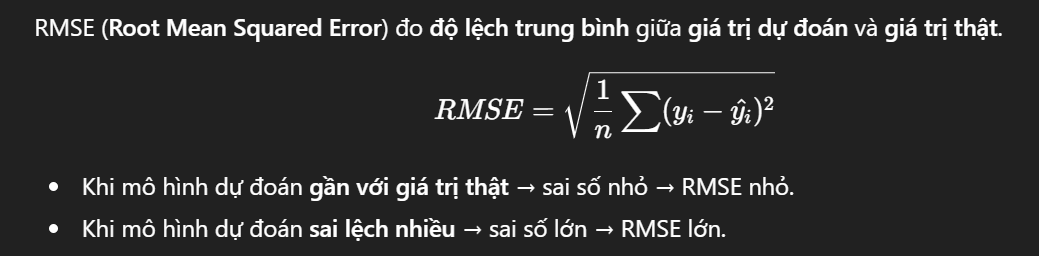
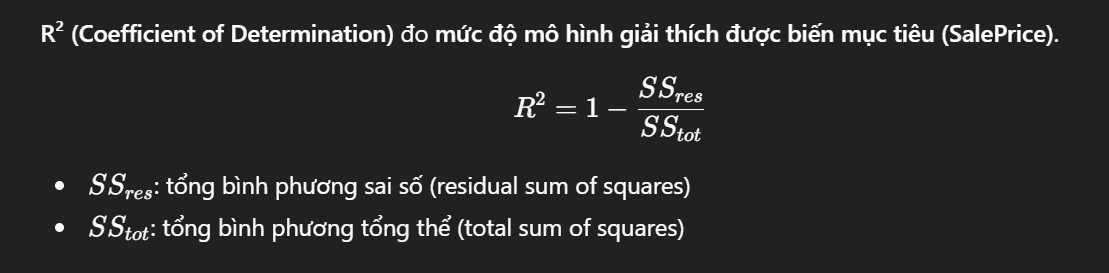

In [14]:
from datetime import datetime
from sklearn.metrics import mean_squared_error, r2_score

# Dự đoán trên tập train và validation
y_train_pred = best_model.predict(X_train_split)
y_val_pred = best_model.predict(X_val)

# Tính các chỉ số
rmse_train = np.sqrt(mean_squared_error(y_train_split, y_train_pred))
rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred))
r2_train = r2_score(y_train_split, y_train_pred)
r2_val = r2_score(y_val, y_val_pred)

# Ghi log hiệu suất mô hình XGBoost vào file modeling.xlsx
log_data = {
    "Thời gian chạy": [datetime.now().strftime("%Y-%m-%d %H:%M:%S")],
    "Nội dung làm": ["Đánh giá hiệu suất mô hình XGBoost trên train/validation"],
    "Kết luận": [f"RMSE Train: {rmse_train:.5f}, RMSE Validation: {rmse_val:.5f}, R² Train: {r2_train:.4f}, R² Validation: {r2_val:.4f}"]
}
log_df = pd.DataFrame(log_data)
with pd.ExcelWriter("../reports/modeling.xlsx", mode="a", if_sheet_exists="overlay", engine="openpyxl") as writer:
    log_df.to_excel(writer, index=False, header=False, startrow=writer.sheets['Sheet1'].max_row)
print("Đã ghi log vào file: modeling.xlsx")


Đã ghi log vào file: modeling.xlsx


Nhận xét:

Mô hình có hiệu suất cao, R² train gần bằng R² validation cho thấy mô hình không overfit

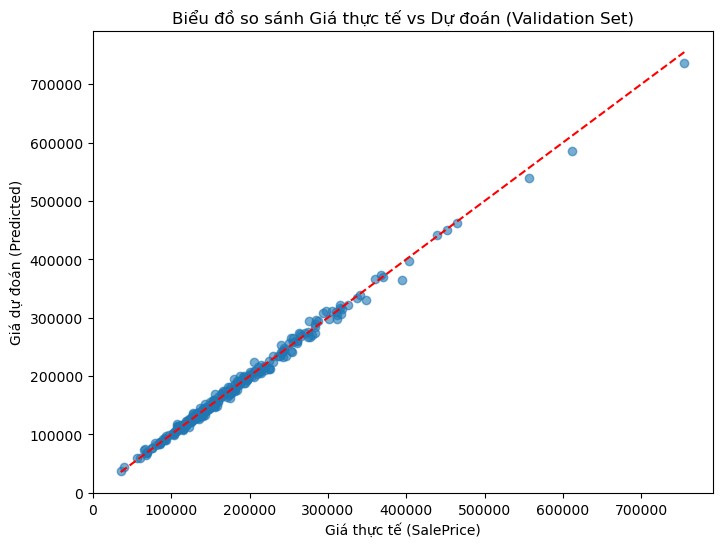

In [129]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(y_val_real, y_val_pred, alpha=0.6)
plt.xlabel("Giá thực tế (SalePrice)")
plt.ylabel("Giá dự đoán (Predicted)")
plt.title("Biểu đồ so sánh Giá thực tế vs Dự đoán (Validation Set)")
plt.plot([y_val_real.min(), y_val_real.max()], [y_val_real.min(), y_val_real.max()], 'r--')
plt.show()

Nhận xét:

Các điểm màu xanh (giá dự đoán vs giá thực tế) nằm rất sát với đường đỏ. Điều này chứng tỏ mô hình dự đoán rất chính xác, vì sai lệch giữa giá dự đoán và giá thật là rất nhỏ. Chỉ vài điểm lệch nhẹ ở vùng giá cao, có thể do dữ liệu ít ở vùng này (dữ liệu cao giá hiếm khi gặp)

## Lưu mô hình này lại 

In [131]:
import os
import joblib

os.makedirs('../models', exist_ok=True)
joblib.dump(best_model, '../models/xgboost_v1.pkl')
print("Mô hình đã được lưu vào '../models/xgboost_v1.pkl'")

Mô hình đã được lưu vào '../models/xgboost_v1.pkl'


## Sử dụng mô hình đó để dự đoán trên dữ liệu test và tạo file nộp bài (submission file) cho Kaggle

In [133]:
import pandas as pd
import numpy as np
import joblib


df_train_clean = pd.read_csv("../data/03_processed/train_clean.csv")
df_test_clean = pd.read_csv("../data/03_processed/test_clean.csv")

y_train = df_train_clean["SalePrice"]
X_train = df_train_clean.drop(["SalePrice", "Id"], axis=1)

# 3. CHUẨN BỊ DỮ LIỆU TEST
X_test_raw = df_test_clean.drop("Id", axis=1)

# Đồng bộ cột giữa train và test:
# - Nếu test thiếu cột nào → thêm và gán 0
# - Nếu test thừa cột → loại bỏ
X_test = X_test_raw.reindex(columns=X_train.columns, fill_value=0)

print("Số cột sau khi đồng bộ:", X_test.shape[1])

#TẢI MÔ HÌNH TỐT NHẤT
model_path = "../models/xgboost_v1.pkl"
best_model = joblib.load(model_path)
print(f"Đã tải mô hình từ {model_path}")

# DỰ ĐOÁN TRÊN TẬP TEST
# Dự đoán log(SalePrice)
preds_test_log = best_model.predict(X_test)

# Chuyển ngược log → giá trị thật
preds_test_final = np.expm1(preds_test_log)

# TẠO FILE SUBMISSION
df_test_original = pd.read_csv("../data/01_raw/test.csv")

submission = pd.DataFrame({
    "Id": df_test_original["Id"],
    "SalePrice": preds_test_final
})

submission.to_csv("submission2.csv", index=False)
print("File submission.csv đã được tạo thành công!")


Số cột sau khi đồng bộ: 262
Đã tải mô hình từ ../models/xgboost_v1.pkl
File submission.csv đã được tạo thành công!


Kết quả file submission2.csv:

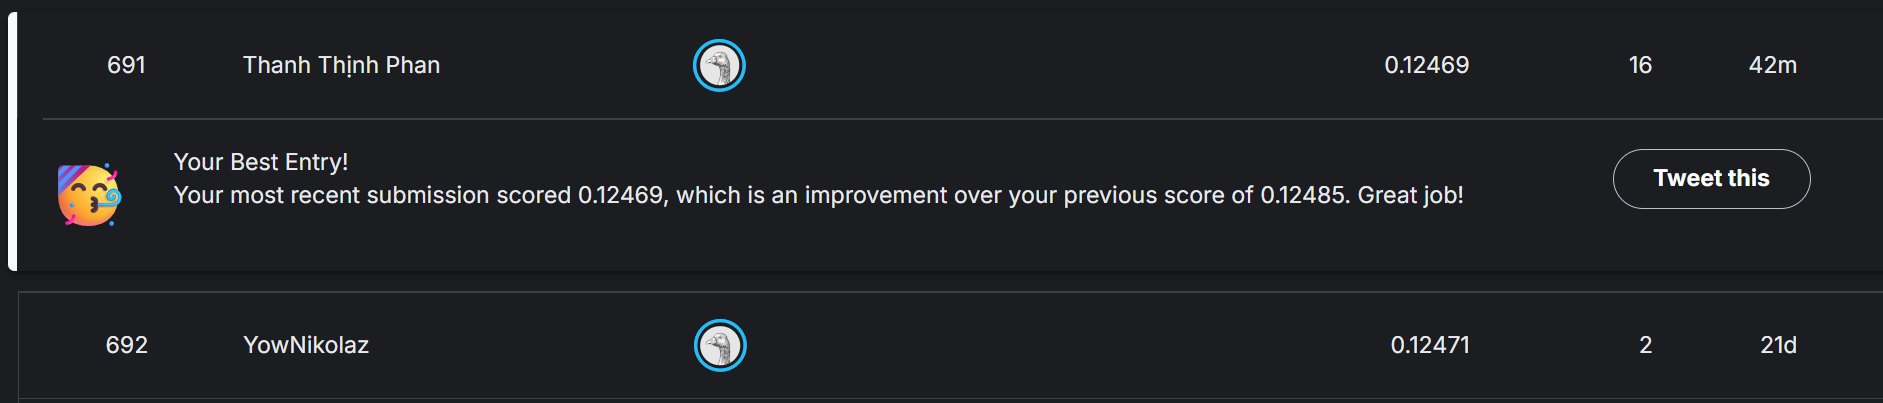